In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K
import pickle
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from keras.models import load_model

In [35]:
df = pd.read_csv('dvd rental final csv.csv')

In [36]:
# Ensure the rental_date and return_date are in datetime format
df['rental_date'] = pd.to_datetime(df['rental_date'])
df['return_date'] = pd.to_datetime(df['return_date'])

# Calculate the difference in days between return_date and rental_date
df['rental_actual_duration'] = (df['return_date'] - df['rental_date']).dt.days

In [37]:
df.head()

,inventory_id,film_id,title,rental_duration,rental_rate,length,replacement_cost,rating,category,language,store_id,rental_id,rental_date,customer_id,return_date,amount,active,rental_actual_duration
0,3419,749,Rules Human,6,4.99,153,19.99,R,Horror,English,1,1520,2005-06-15 23:57:20,341,2005-06-24 23:46:20,7.99,1,8.0
1,2512,552,Majestic Floats,5,0.99,130,15.99,PG,Documentary,English,2,1778,2005-06-16 18:54:48,341,2005-06-22 16:08:48,1.99,1,5.0
2,2507,551,Maiden Home,3,4.99,138,9.99,PG,New,English,1,1849,2005-06-17 00:13:19,341,2005-06-23 18:37:19,7.99,1,6.0
3,2047,445,Hyde Doctor,5,2.99,100,11.99,G,Classics,English,1,2829,2005-06-19 21:11:30,341,2005-06-24 18:10:30,2.99,1,4.0
4,2569,563,Massacre Usual,6,4.99,165,16.99,R,Games,English,1,3130,2005-06-20 19:03:22,341,2005-06-29 18:05:22,7.99,1,8.0


In [38]:
df.drop('rental_date', axis=1, inplace=True)
df.drop('return_date', axis=1, inplace=True)
df.drop('title',axis=1,inplace=True)
df.drop(['inventory_id','film_id','store_id','rental_id','customer_id'], axis=1, inplace=True)
df.drop('language',axis=1, inplace=True)

In [39]:
df.drop('rental_duration', axis=1, inplace=True)

In [40]:
df.head()

,rental_rate,length,replacement_cost,rating,category,amount,active,rental_actual_duration
0,4.99,153,19.99,R,Horror,7.99,1,8.0
1,0.99,130,15.99,PG,Documentary,1.99,1,5.0
2,4.99,138,9.99,PG,New,7.99,1,6.0
3,2.99,100,11.99,G,Classics,2.99,1,4.0
4,4.99,165,16.99,R,Games,7.99,1,8.0


In [41]:
df.dropna(inplace=True)

In [42]:
df['rating'] = df['rating'].map({"PG-13":0,'NC-17':1,'PG':2,'R':3,"G":4}) #mapping
df['category'] = df['category'].map({'Horror':0, 'Documentary':1, 'New':2, 'Classics':3, 'Games':4, 'Sci-Fi':5,
       'Foreign':6, 'Family':7, 'Travel':8, 'Music':9, 'Sports':10, 'Comedy':11,
       'Drama':12, 'Action':13, 'Children':14, 'Animation':15}) #mapping

In [43]:
df.head()

,rental_rate,length,replacement_cost,rating,category,amount,active,rental_actual_duration
0,4.99,153,19.99,3,0,7.99,1,8.0
1,0.99,130,15.99,2,1,1.99,1,5.0
2,4.99,138,9.99,2,2,7.99,1,6.0
3,2.99,100,11.99,4,3,2.99,1,4.0
4,4.99,165,16.99,3,4,7.99,1,8.0


In [44]:
# Separate features and target
x = df.drop('amount', axis=1)  # Replace 'revenue_column' with the actual column name for revenue
y = df['amount']

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [46]:
x_train

,rental_rate,length,replacement_cost,rating,category,active,rental_actual_duration
13667,2.99,141,21.99,0,7,1,3.0
10394,2.99,184,27.99,0,3,1,2.0
13279,2.99,90,25.99,1,4,1,7.0
12448,2.99,152,9.99,0,15,1,7.0
4333,4.99,112,14.99,4,11,1,5.0
...,...,...,...,...,...,...,...
4442,0.99,118,19.99,0,9,1,7.0
1960,0.99,125,21.99,1,13,1,1.0
1417,4.99,50,18.99,1,11,1,7.0
4630,2.99,146,25.99,0,7,1,7.0


# Deep Learning

In [47]:
model1 = Sequential()
# Input layer (match input shape to your data)
model1.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))

# Hidden layers
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(16, activation='relu'))


model1.add(Dense(1))

# Compile the model for regression with 'mse' loss function
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError()])

/Users/saro/Desktop/dvdrentaldl/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,937 (1015.38 KB)

 Trainable params: 259,937 (1015.38 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
result = model1.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.9197 - mean_absolute_error: 1.6293 - mean_squared_error: 4.9197 - val_loss: 1.3620 - val_mean_absolute_error: 0.9025 - val_mean_squared_error: 1.3620
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4214 - mean_absolute_error: 0.9278 - mean_squared_error: 1.4214 - val_loss: 1.5387 - val_mean_absolute_error: 0.9315 - val_mean_squared_error: 1.5387
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3464 - mean_absolute_error: 0.8949 - mean_squared_error: 1.3464 - val_loss: 1.3946 - val_mean_absolute_error: 0.9378 - val_mean_squared_error: 1.3946
Epoch 4/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2857 - mean_absolute_error: 0.8615 - mean_squared_error: 1.2857 - val_loss: 1.1429 - val_mean_absolute_error: 0.7907 - val_mean_squared_error: 1.1429
Epoch 5/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2079 - mean_absolute_error: 0.8177 - mean_squared_error: 1.2079 - val_loss: 2.0240 - 

In [50]:
result.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

In [51]:
# Evaluate the model
test_loss = model1.evaluate(x_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.8922 - mean_absolute_error: 0.6727 - mean_squared_error: 0.8922
Test Loss (MSE): [0.8763014674186707, 0.8763014674186707, 0.6606839299201965]


In [52]:
from sklearn.metrics import r2_score
y_pred = model1.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
R² score: 0.8491833994746444


In [53]:
result_df = pd.DataFrame(result.history)
result_df

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,2.639710,1.206963,2.639710,1.362004,0.902538,1.362004
1,1.411582,0.918703,1.411582,1.538704,0.931507,1.538704
2,1.292825,0.869154,1.292825,1.394609,0.937800,1.394609
3,1.255622,0.844682,1.255622,1.142935,0.790656,1.142935
4,1.199919,0.813266,1.199919,2.024004,1.143176,2.024004
...,...,...,...,...,...,...
95,0.721396,0.568737,0.721396,0.787220,0.616727,0.787220
96,0.720318,0.569026,0.720318,0.798601,0.640737,0.798601
97,0.707334,0.561973,0.707334,0.802844,0.613653,0.802844
98,0.719495,0.568639,0.719495,0.895074,0.624237,0.895074


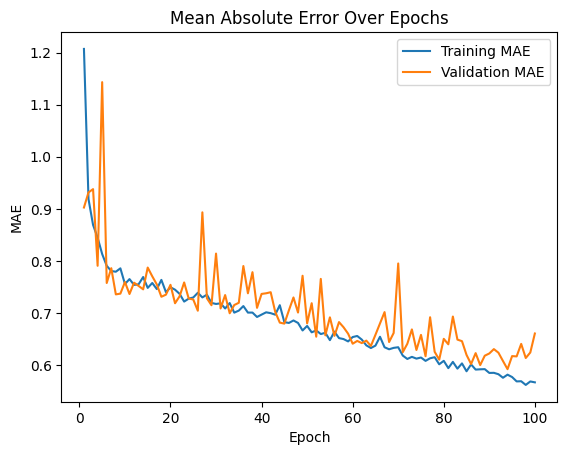

In [54]:
# Plot Mean Absolute Error (MAE) over epochs
plt.plot(range(1, 101), result_df['mean_absolute_error'], label='Training MAE')
plt.plot(range(1, 101), result_df['val_mean_absolute_error'], label='Validation MAE')

plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

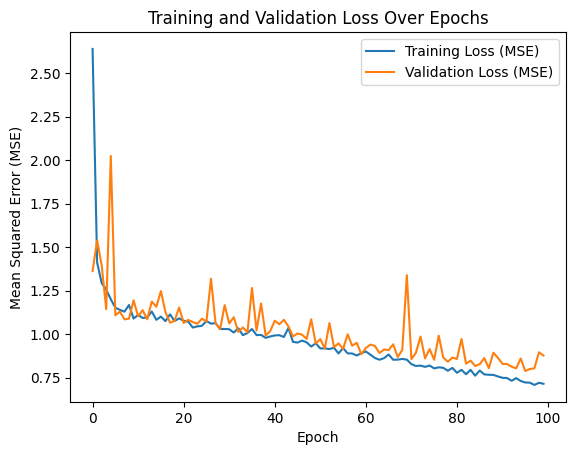

In [55]:
# Plot the training and validation loss

plt.plot(result.history['loss'], label='Training Loss (MSE)')
plt.plot(result.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step


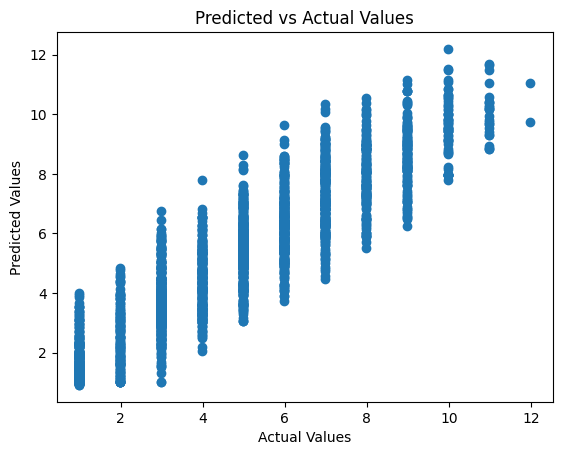

In [67]:
# Get predictions for the test set
y_pred = model1.predict(x_test)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [57]:
# Get predictions for the test set
y_pred = model1.predict(x_test)

# If y_test is a pandas Series, convert it to a NumPy array
if isinstance(y_test, pd.Series):
    y_test = y_test.values

# Flatten y_pred if it's a 2D array
y_pred = y_pred.flatten()

# Calculate residuals (errors)
residuals = y_test - y_pred


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step


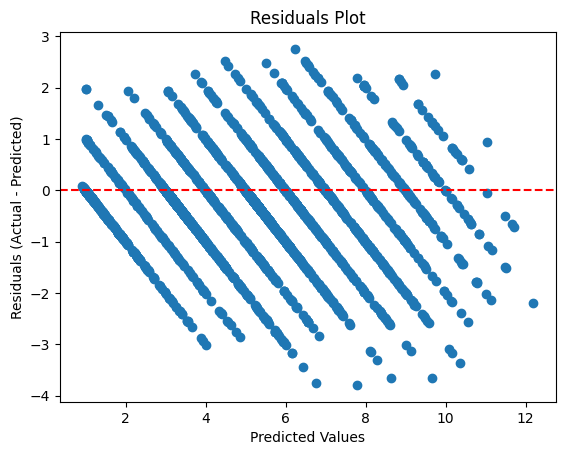

In [58]:
# Plot residuals
plt.scatter(y_pred, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [59]:
model1.save("DL_Algo.h5")

In [60]:
new_model = load_model("DL_Algo.h5")

In [61]:
first_row = x_test.iloc[0].to_numpy()

In [62]:
first_row

array([ 4.99, 75.  , 12.99,  2.  ,  9.  ,  1.  ,  1.  ])

In [63]:
for x in first_row:
    print(type(x))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [64]:
new_model.predict(np.array([first_row]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[5.207833]], dtype=float32)

In [65]:
x_test.columns

Index(['rental_rate', 'length', 'replacement_cost', 'rating', 'category',
       'active', 'rental_actual_duration'],
      dtype='object')